#**Kaplan - Meier Estimator**

The Kaplan–Meier estimator also known as the product limit estimator, is a non-parametric statistic used to estimate the survival function from lifetime data. In medical research, it is often used to measure the fraction of patients living for a certain amount of time after treatment. In other fields, Kaplan–Meier estimators may be used to measure the length of time people remain unemployed after a job loss,[5] 
 
A plot of the Kaplan–Meier estimator is a series of declining horizontal steps which, with a large enough sample size, approaches the true survival function for that population. The value of the survival function between successive distinct sampled observations ("clicks") is assumed to be constant.

An important advantage of the Kaplan–Meier curve is that the method can take into account some types of censored data, particularly right-censoring, which occurs if a patient withdraws from a study, is lost to follow-up, or is alive without event occurrence at last follow-up. On the plot, small vertical tick-marks indicate individual patients whose survival times have been right-censored. When no truncation or censoring occurs, the Kaplan–Meier curve is the complement of the empirical distribution function.

In medical statistics, a typical application might involve grouping patients into categories, for instance, those with Gene A profile and those with Gene B profile. In the graph, patients with Gene B die much more quickly than those with Gene A. After two years, about 80% of the Gene A patients survive, but less than half of patients with Gene B.

The Kaplan-Meier Survival Curve is the probability of surviving a particular time poin. There are three assumptions when using Kaplan-Meier Estimate in survival Analysis,[3] and they are as follows:

* Subjects that are censored have the same survival prospects as those who continue to be followed.
* Survival probability is the same all the subjects, irrespective of when they are recruited in the study.
* The event of interest happens at the specified time. This is because the event can happen between two examinations. The estimated survival time can be more accurately measured if the examination happens frequently i.e if the time gap between examinations is very small.

[Figure 1](https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e) show how the kaplan Merier curve is calculated for a small data set.

<figure>
<center>
<img src='https://www.computing.dcu.ie/~amccarren/mcm_images/kaplan_meirer_curve.png' />
<figcaption>Figure 1: Shows the user level time data in color.; b. Shows Kaplan Meier (KM)Estimate Curve; c. Formula for estimation of KM curve; d. Table showing the calculations</figcaption>
</center>
</figure>




The survival probability at any particular time is calculated as the number of subjects surviving divided by the number of people at risk. The censored subjects are not counted in the denominator. The equation is given as follows:

$$\hat{S}(t) = \prod_{t_i \le t} \frac{n_i - d_i}{n_i}$$

Here, $n_i$ represents the number of subjects at risk prior to time $t$. $d_i$ represents the number experiencing the event of interest at time $t$.

For the Survival Curve for the Kaplan-Meier Estimate, the y-axis represents the probability the subject still hasn’t experienced the event of interest after time t, where time t is on the x-axis. In order to see how uncertain we are about the point estimates, we use the confidence intervals[4]. The median time is the time where on average, half of the population has experienced the event of interest,[9].

Now we are going to implement a Kaplan Meirer Estimate curve using puthon. It is quite easy. It would be nice to try this out from first principles and see if you get the same result. As usual leave your thoughts on the comments board.

References

[1] What is a Cox model?, Stephen J Walters. www.whatisseries.co.uk

[2] Understanding survival analysis: Kaplan-Meier estimate: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/

[3] Statistics review 12: survival analysis. Bewick V, Cheek L, Ball J. Crit Care. 2004 Oct; 8(5):389–94.
[4] The Greenwood and Exponential Greenwood. Confidence Intervals in Survival Analysis — S. Sawyer — September 4, 2003


*italicized text*

[5] https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator



In the [example](https://github.com/anurag-code/Survival-Analysis-Intuition-Implementation-in-Python/blob/master/Survival%20Analysis%20-%20Quick%20Implementation.ipynb) below we import the lifelines library, and implement a toy example and a customer churn example from [Gitlab](https://github.com/anurag-code/Survival-Analysis-Intuition-Implementation-in-Python/blob/master/Survival%20Analysis%20-%20Quick%20Implementation.ipynb). 

In [ ]:
!pip install imgaug=='0.2.6'
!pip install lifelines 

     |████████████████████████████████| 631 kB 5.3 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=522df8b505b9ad467d78c56ffdf172175418569c7552d8cc5d34869cdc80da7f
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.7
    Uninstalling imgaug-0.2.7:
      Successfully uninstalled imgaug-0.2.7


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/dcu/future Learn_v2/MOOC 5 - CA683 - Point Estimation and Future Impact Calculation/M5 Colab Files/Data")
!ls
#G:\My Drive\dcu\future Learn_v2\MOOC 5 - CA683 - Point Estimation and Future Impact Calculation\M5 Colab Files\Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
calories.csv			  poisson_predictions.csv
exercise.csv			  SN_m_tot_V2.0.csv
nyc_bb_bicyclist_counts.csv	  student_mat.csv
nyc_bb_bicyclist_counts_test.csv  Telco-Customer-Churn.csv


A simple example of a Kaplan Meirer curve.

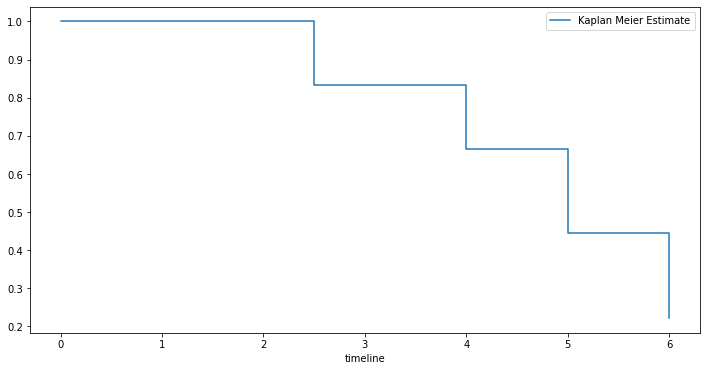

In [ ]:
# Python code to create the above Kaplan Meier curve
from lifelines import KaplanMeierFitter

## Example Data 
durations = [5,6,6,2.5,4,4]
event_observed = [1, 1, 0, 1, 1, 0]

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

The following dataset examines telco churns. You should find it on loop.

In [ ]:
##  create a dataframe
df = pd.read_csv("Telco-Customer-Churn.csv")

In [ ]:

## Have a first look at the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:

## Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [ ]:
## Impute the null value with the median value

df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [ ]:

## Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

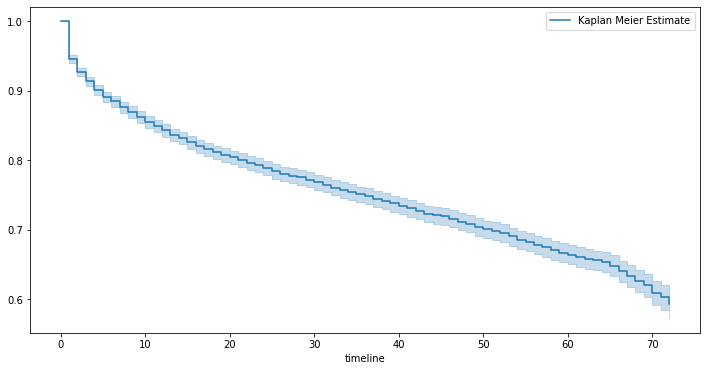

In [ ]:
## Lets create an overall KaplanMeier curve, without breaking it into groups of covariates.

## Import the library
from lifelines import KaplanMeierFitter


durations = df['tenure'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

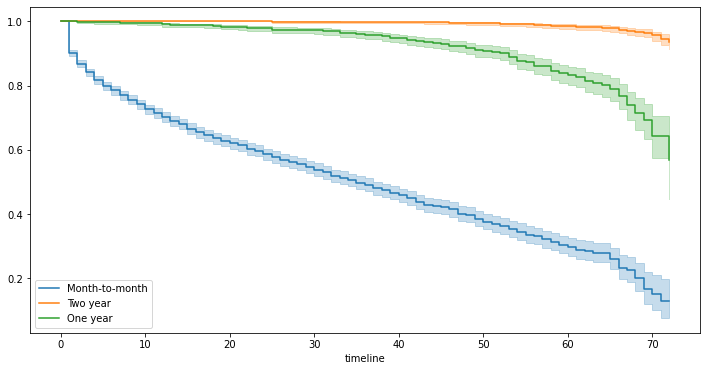

In [ ]:
kmf = KaplanMeierFitter() 


T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored


groups = df['Contract']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Month-to-month')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Two year')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis


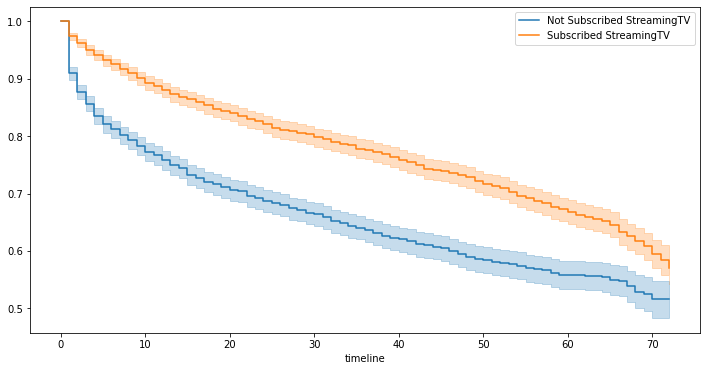

In [ ]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = df['StreamingTV']   
i1 = (groups == 'No')      ## group i1 , having the pandas series for the 1st cohort
i2 = (groups == 'Yes')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Not Subscribed StreamingTV')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Subscribed StreamingTV')
kmf1.plot(ax=a1)